# Image Classification

In [1]:
from fastai.vision.all import *

## Create the dataloaders

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.20, seed=42,
    label_func=lambda x: x[0].isupper(),
    item_tfms=Resize(224)
)

## Create a `learner` and fit or fine tune the model

In [3]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/Users/neeraj/.virtualenvs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/neeraj/.virtualenvs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.175336,0.032477,0.012179,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.069351,0.026499,0.006089,01:33
1,0.031654,0.026549,0.006766,01:33
2,0.015531,0.011936,0.004736,01:33


## Inference

It is False 
Probablity that it is a cat: 0.000%. 


It is True 
Probablity that it is a cat: 100.000%. 


It is False 
Probablity that it is a cat: 0.029%. 


It is True 
Probablity that it is a cat: 99.917%. 


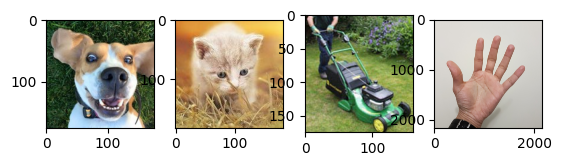

In [7]:
from fastai.data.external import *
img1 = Image.open('images/dog.jpg')
img2 = Image.open('images/cat.jpg')
img3 = Image.open('images/lawn-mowing.jpg')
img4 = Image.open('images/hand_five.jpg')

for n, img in enumerate([img1, img2, img3, img4]):
    plt.subplot(1,4,n+1)
    plt.imshow(img)
    is_cat, some, probs = learn.predict(img)
    print(f"It is {is_cat} ") #{'a cat.' if is_cat.startswith('T') else 'not a cat.' }")
    print(f"Probablity that it is a cat: {probs[1].item()*100:.3f}%. ")

('False', TensorBase(0), TensorBase([1.0000e+00, 3.5186e-08]))